# **Spam detection using SVM**

---

**Machine learning and ANN_2025-26_IV_B**  
**Name:** Ojasv Singh  
**University Roll No.:** 202401100500120  
**CSIT - B**

---

In [3]:
import kagglehub

path = kagglehub.dataset_download("ozlerhakan/spam-or-not-spam-dataset")
print(path)

In [4]:
import os

csv_path=os.path.join(path,"spam_or_not_spam.csv")
print(csv_path)

C:\Users\OJASV\.cache\kagglehub\datasets\ozlerhakan\spam-or-not-spam-dataset\versions\1\spam_or_not_spam.csv


In [5]:
import pandas as pd

df=pd.read_csv(csv_path)
print(df.columns)

Index(['email', 'label'], dtype='object')


In [6]:
# Drop empty rows
df = df.dropna(subset=["email", "label"]).reset_index(drop=True)

In [7]:
from sklearn.model_selection import train_test_split

# Train/test
X_train,X_test,y_train,y_test=train_test_split(df["email"],df["label"],test_size=0.2,random_state=42)

In [8]:
# Text-> TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
from sklearn.svm import LinearSVC

# Model
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

LinearSVC()

In [10]:
from sklearn.metrics import accuracy_score,classification_report

# Predict
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       0.99      0.95      0.97       100

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



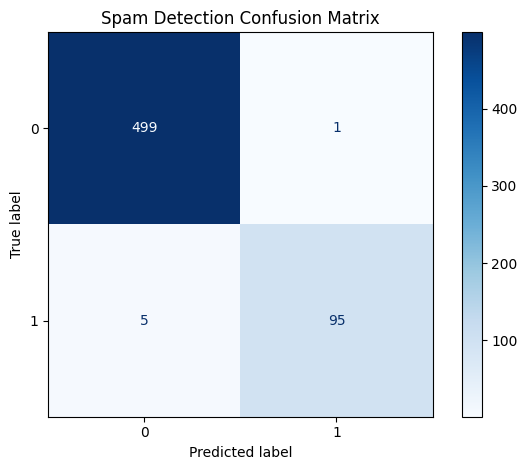

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Spam Detection Confusion Matrix")
plt.tight_layout()
plt.show()